# Лабораторная работа
<p>Тема: «<b>Прогнозирование данных на основе множественной линейной регрессии</b>»</p>
<p>Гусев А.А., Кувылькин А.В., Трифонов Ю.Я., 494 группа, 1 вариант.</p>
<p>Модель: <b>Linear Regression</b>.</p>
<p>Входные параметры:
    <ul>
        <li>bedrooms</li>
        <li>bathrooms</li>
        <li>sqft_living</li>
    </ul>
</p>
<p>Выходной параметр: <b>price</b>.</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv', low_memory=False)

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
features_considered = ['price', 
                       'bedrooms', 'bathrooms',
                       'sqft_living']

In [5]:
features = data[features_considered]
#features.index = data['date']
#features.index = data['price']
features = features.dropna(subset=['price'])
X = features.drop('price', axis=1)
Y = features['price']

In [6]:
features.corr()

,price,bedrooms,bathrooms,sqft_living
price,1.000000,0.308350,0.525138,0.702035
bedrooms,0.308350,1.000000,0.515884,0.576671
bathrooms,0.525138,0.515884,1.000000,0.754665
sqft_living,0.702035,0.576671,0.754665,1.000000


In [7]:
features.sort_values(by=['price'])

,price,bedrooms,bathrooms,sqft_living
1149,75000.0,1,0.00,670
15293,78000.0,2,1.00,780
465,80000.0,1,0.75,430
16198,81000.0,2,1.00,730
8274,82000.0,3,1.00,860
...,...,...,...,...
1448,5350000.0,5,5.00,8000
4411,5570000.0,5,5.75,9200
9254,6885000.0,6,7.75,9890
3914,7062500.0,5,4.50,10040


In [8]:
#X = X.sort_index()
#Y = Y.sort_index()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [12]:
model.score(X_train, y_train)

0.5043973669666189

In [13]:
model.score(X_test, y_test)

0.5179130337545681

In [14]:
pred = model.predict(X_test)

In [15]:
metrics_rmse = round(np.sqrt(mean_squared_error(y_test, pred)),2)

print("Testing performance")
print(f"rmse: {round(metrics_rmse,2)}")

Testing performance
rmse: 243141.28


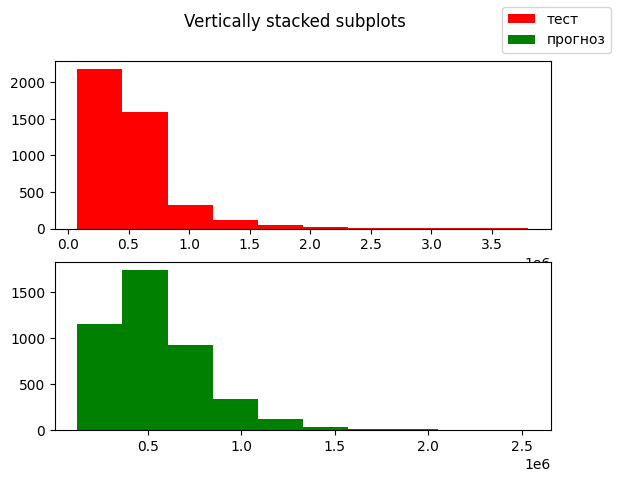

In [22]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(y_test, color='red', label="тест")
axs[1].hist(pred, color='green', label="прогноз")
fig.legend()

In [17]:
model_coeffs = model.coef_

In [18]:
model.intercept_

71449.17441586102

In [19]:
print("Функциональный вид модели:")
roundNum = 2;
print(f"price = ({round(model_coeffs[0],roundNum)})*{X.columns[0]} + ({round(model_coeffs[1],roundNum)})*{X.columns[1]} + ({round(model_coeffs[2],roundNum)})*{X.columns[2]} + ({round(model.intercept_,roundNum)})")

Функциональный вид модели:
price = (-57440.38)*bedrooms + (5183.08)*bathrooms + (313.48)*sqft_living + (71449.17)


In [20]:
model_line = model_coeffs[0]*X.sort_index().bedrooms+model_coeffs[1]*X.sort_index().bathrooms+model_coeffs[2]*X.sort_index().sqft_living+model.intercept_